In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler,MinMaxScaler
import pandas as pd


read Data


In [ ]:
df = pd.read_csv("/content/train.csv")

drop duplicated row

In [ ]:
df= df.drop_duplicates()

handle null vallues

In [ ]:
def drop_columns_with_high_null_percentage(df, threshold=0.7):
    # Calculate the null percentage for each column
    null_percentage = df.isnull().mean()

    # Identify columns with null percentage exceeding the threshold
    columns_to_drop = null_percentage[null_percentage > threshold].index.tolist()

    # Drop the identified columns
    df_dropped = df.drop(columns=columns_to_drop)

    for column in df_dropped.columns:
        if df_dropped[column].dtype == 'object':
            # For categorical columns, fill with the mode
            mode_value = df_dropped[column].mode()[0]
            df_dropped[column].fillna(mode_value, inplace=True)
        else:
            # For numeric columns, fill with the mean
            mean_value = df_dropped[column].mean()
            df_dropped[column].fillna(mean_value, inplace=True)

    return df_dropped

    df = drop_columns_with_high_null_percentage(df, threshold=0.7)


encoding categoral values

In [ ]:
def encoding_categoral_data(data, columns):
    lbl = LabelEncoder()
    df_encoded_categoral = data[columns].apply(lbl.fit_transform)
    return df_encoded_categoral

numerical features Scaling

In [ ]:
def scaling_numerical_data_feature(data, columns):
    scaler = StandardScaler()
    scaled_numerical_column = scaler.fit_transform(data[columns])

    scaled_numerical_df = pd.DataFrame(scaled_numerical_column, columns=columns)
    return scaled_numerical_df

Handle outliers  

In [ ]:
def handle_outliers(data, columns):
    for i in numerical_columns:
        Q1: float = df[i].quantile(0.25)
        Q3: float = df[i].quantile(0.75)
        IQR = Q3 - Q1
        up_limit: float = Q3 + 1.5 * IQR
        low_limit: float = Q1 - 1.5 * IQR
        df.loc[df[i] > up_limit, i]: float = up_limit
        df.loc[df[i] < low_limit, i]: float = low_limit

Divide values into categorical and numerical

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
handle_outliers(df, numerical_columns)

numerical_columns = numerical_columns.delete(-1)

df_encoded_categoral = encoding_categoral_data(df, categorical_columns)

scaled_numerical_df = scaling_numerical_data_feature(df, numerical_columns)

target Scaling

In [ ]:
sale = ["SalePrice"]
scaler_y = MinMaxScaler(feature_range=(0, 1))
scaled_y = scaler_y.fit_transform(df[['SalePrice']])

scaled_numerical_target_y = pd.DataFrame(scaled_y, columns=sale)

Combine data

In [ ]:
df_final = pd.concat([df_encoded_categoral, scaled_numerical_df, scaled_numerical_target_y], axis=1)

Spliting Data into training and testing

In [ ]:
X = df_final.drop(columns=['SalePrice'])
y = df_final['SalePrice']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train and Model

In [ ]:
# Step 2: Polynomial Feature Generation
degree = 1  # You can adjust the degree of the polynomial
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Step 3: Model Selection (Polynomial Regression)
model = LinearRegression()

# Step 4: Training the Model
model.fit(X_train_poly, y_train)

# Step 5: Evaluate the Model
y_pred = model.predict(X_test_poly)



Evalute the Model

Mean Squared Error: 0.00544604772595352
Root Mean Squared Error: 0.07379734226890235
R-squared (R2): 0.8962876753806254


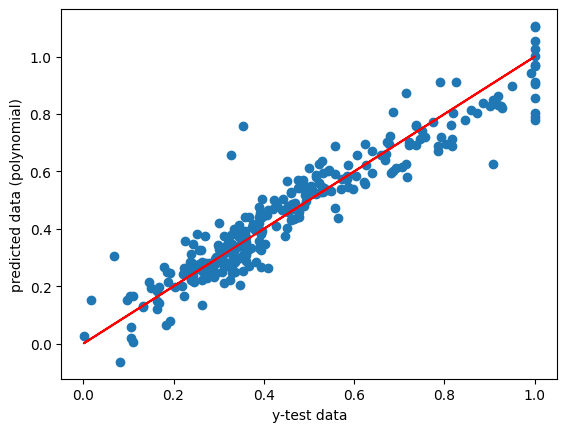

In [ ]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared (R2): {r2}')



plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red')
plt.xlabel('y-test data')
plt.ylabel('predicted data (polynomial)')
plt.show()

preprocessing on the test data

In [ ]:
data_test = pd.read_csv('/content/test.csv')



data_test=drop_columns_with_high_null_percentage(data_test, threshold=0.7)

categorical_columns_df2 = data_test.select_dtypes(include=['object']).columns
numerical_columns_df2 = data_test.select_dtypes(include=['int64', 'float64']).columns

#outliers
handle_outliers(data_test,numerical_columns_df2)


df2_encoded_categoral = encoding_categoral_data(data_test,categorical_columns_df2)
scaled_numerical_df2 = scaling_numerical_data_feature(data_test,numerical_columns_df2)

data_test_final = pd.concat([df2_encoded_categoral,scaled_numerical_df2],axis =1)






model

In [ ]:
degree = 1 # You can adjust the degree of the polynomial
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
data_test_final = poly.transform(data_test_final)

# Step 3: Model Selection (Polynomial Regression)
model = LinearRegression()

# Step 4: Training the Model
model.fit(X_train_poly, y_train)


y_pred = model.predict(data_test_final)

predicted values

In [ ]:
original_data = scaler_y.inverse_transform(y_pred.reshape(-1, 1))

print("the first ten predicted results from the test file \n" , original_data[:10])

the first ten predicted results from the test file 
 [[154881.29494277]
 [308539.60767672]
 [112661.75169468]
 [171445.40347449]
 [298685.53756347]
 [ 74489.57571284]
 [225453.72639335]
 [134089.75390209]
 [ 71310.96621278]
 [140624.73114923]]
